In [1]:
# Preamble
from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

In [6]:
mendel_masses = Table.read('../fits/Simard+Mendel/mendel_masses.fits')
sparcfire_samples = Table.read('../fits/sparcfire/sparcfire_samples.fits')
sparcfire_r = Table.read('../fits/sparcfire/pitch_angles_r.fits')
sparcfire_g = Table.read('../fits/sparcfire/pitch_angles_g.fits')
g_ok = Table.read('g_vs_r/g_ok.fits')

#ok_P = sparcfire['P'] > 0

in_spiral = np.all([sparcfire_samples['in_spiral'],sparcfire_samples['axial_ok'],
                    sparcfire_samples['in_mass_limit'],g_ok['ok']],axis=0)

ok_r = sparcfire_r['P'] > 0
ok_g = sparcfire_g['P'] > 0
unbarred = sparcfire_samples['unbarred']
spiral_sample = np.all([in_spiral,ok_r,ok_g],axis=0)
unbarred_spiral_sample = np.all([spiral_sample,unbarred],axis=0).T

print('{} spiral galaxies in total!'.format(spiral_sample.sum()))

2494 spiral galaxies in total!


In [7]:
from xy_plots import x_vs_y

def bulge_disc_panels(y,mask,fig=None,axarr=None,bins=8,equal_N=True,
                      ylabel='y',xlabel=True,figlabel=None,
                      **kwargs):
    if axarr is None:
        fig, axarr = plt.subplots(1,4,figsize=(20,5),
                                  sharey=True)
        fig.subplots_adjust(wspace=0)
    bd_colnames = ['bulge','disc','bulge+disc','btr']
    bd_xlabels = ['$\log(M_\mathrm{bulge})$','$\log(M_\mathrm{disc})$',
                  '$\log(M_\mathrm{bulge}+M_\mathrm{disc})$','$M_B/M_T$']
    for a, ax in enumerate(axarr):
        bd_data = mendel_masses[bd_colnames[a]]
        _ = x_vs_y(bd_data[mask],y[mask]).continuous_vs_continuous_binned(ax,bins,equal_N,
                                                                          **kwargs)
        if xlabel is True:
            ax.set_xlabel(bd_xlabels[a])
    axarr[0].set_ylabel(ylabel)
    if figlabel is not None:
        axarr[-1].text(0.975,0.975,figlabel,
                       ha='right',va='top',transform=axarr[-1].transAxes)
    return fig, axarr

#### First properties: comparing Mendel+ masses

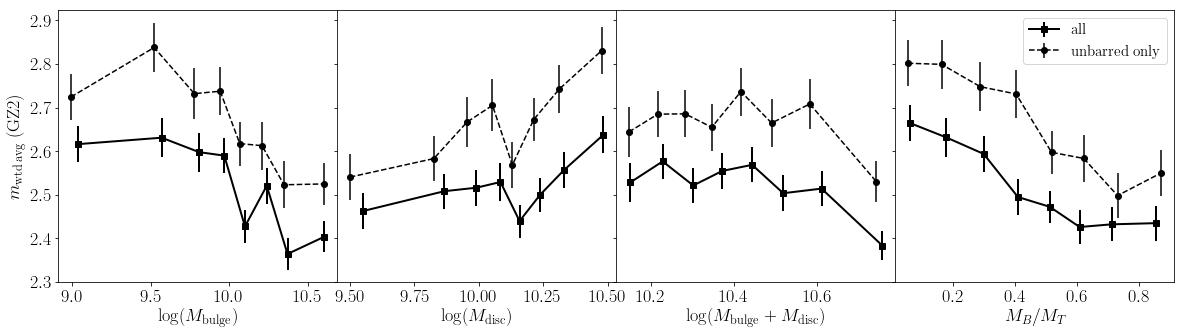

In [8]:
fig, axarr = bulge_disc_panels(sparcfire_r['m_wtd_avg'],spiral_sample,
                               color='k',marker='s',lw=2,
                               ylabel='',label='all')

fig, axarr = bulge_disc_panels(sparcfire_r['m_wtd_avg'],unbarred_spiral_sample,
                               color='k',marker='o',linestyle='dashed',
                               fig=fig,axarr=axarr,ylabel='$m_\mathrm{wtd \, avg}$ (GZ2)',label='unbarred only')

axarr[-1].legend(fontsize=15)

#plt.savefig('figures/bd_vs_m.pdf')

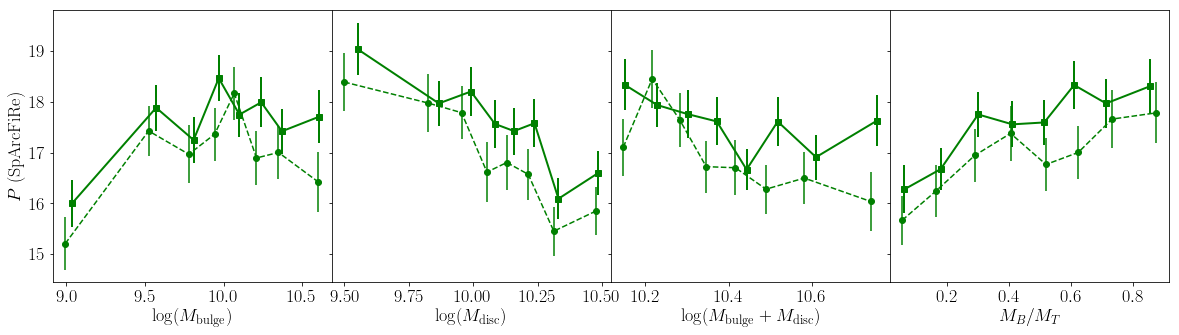

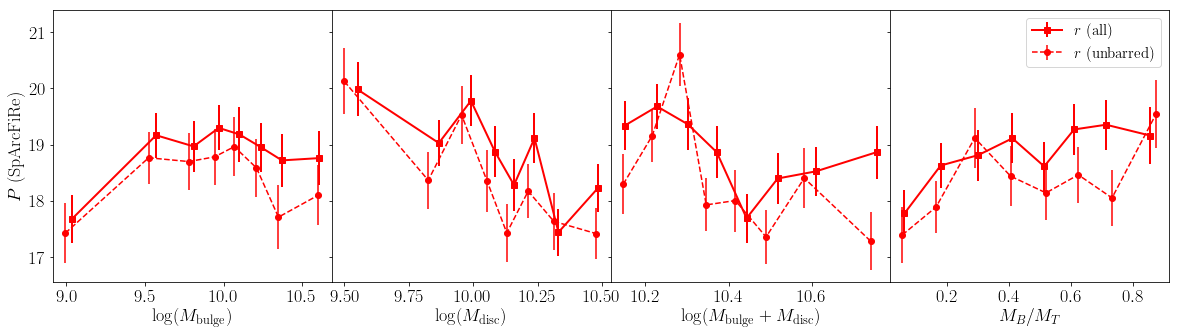

In [15]:
fig, axarr = bulge_disc_panels(sparcfire_g['P'],spiral_sample,
                               color='g',marker='s',lw=2,
                               ylabel='',label='$g$ (all)')

fig, axarr = bulge_disc_panels(sparcfire_g['P'],unbarred_spiral_sample,
                               color='g',marker='o',linestyle='dashed',
                               fig=fig,axarr=axarr,ylabel='$P$ (SpArcFiRe)',label='$g$ (unbarred)')

fig, axarr = bulge_disc_panels(sparcfire_r['P'],spiral_sample,
                               color='r',marker='s',lw=2,
                               ylabel='',label='$r$ (all)')

fig, axarr = bulge_disc_panels(sparcfire_r['P'],unbarred_spiral_sample,
                               color='r',marker='o',linestyle='dashed',
                               fig=fig,axarr=axarr,ylabel='$P$ (SpArcFiRe)',label='$r$ (unbarred)')

axarr[-1].legend(fontsize=15)

#fig.savefig('figures/bd_vs_P.pdf')

#### Next: UV+MIR derived SFRs

In [16]:
sfrs = Table.read('../fits/SF_fits/sfrs.fits')

in_sfr = np.all([sfrs['F']>2,sfrs['w4']>2],axis=0)

sfr_spirals = np.all([in_sfr,spiral_sample],axis=0)
sfr_unbarred_spirals = np.all([in_sfr,unbarred_spiral_sample],axis=0)
print('{} spirals have UV+MIR detections!'.format(sfr_spirals.sum()))
print('+ {} unbarred have UV+MIR'.format(sfr_unbarred_spirals.sum()))

1002 spirals have UV+MIR detections!
+ 719 unbarred have UV+MIR


In [23]:
def sfr_panels(y,mask,fig=None,axarr=None,bins=8,equal_N=True,
               ylabel='y',xlabel=True,figlabel=None,
               **kwargs):
    if axarr is None:
        fig, axarr = plt.subplots(1,3,figsize=(15,5),
                                  sharey=True)
        fig.subplots_adjust(hspace=0,wspace=0)
    sfr_colnames = ['sfr_fuv','sfr_22','sfr_total']
    sfr_xlabels = ['$\log(SFR_\mathrm{FUV})$','$\log(SFR_\mathrm{22})$',
                  '$\log(SFR_\mathrm{FUV}+SFR_\mathrm{22})$']
    for a, ax in enumerate(axarr):
        sfr_data = sfrs[sfr_colnames[a]]
        _ = x_vs_y(sfr_data[mask],y[mask]).continuous_vs_continuous_binned(ax,bins,equal_N,
                                                                           **kwargs)
        if xlabel is True:
            ax.set_xlabel(sfr_xlabels[a])
    axarr[0].set_ylabel(ylabel)
    if figlabel is not None:
        axarr[-1].text(0.975,0.975,figlabel,
                       ha='right',va='top',transform=axarr[-1].transAxes)
    return fig, axarr

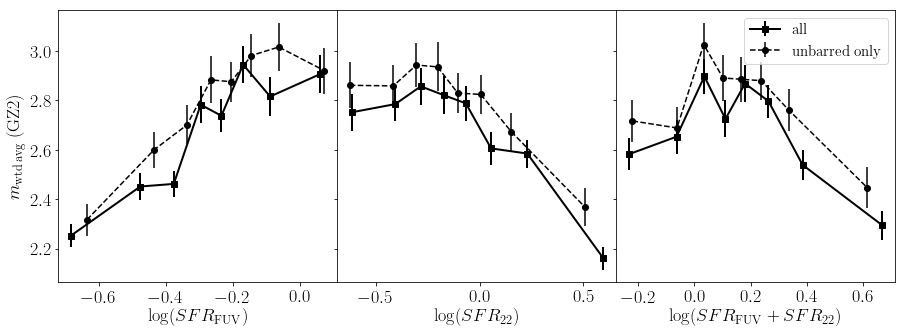

In [24]:
fig, axarr = sfr_panels(sparcfire_r['m_wtd_avg'],sfr_spirals,
                        color='k',marker='s',lw=2,
                        ylabel='',label='all')

fig, axarr = sfr_panels(sparcfire_r['m_wtd_avg'],sfr_unbarred_spirals,
                        color='k',marker='o',linestyle='dashed',
                        fig=fig,axarr=axarr,ylabel='$m_\mathrm{wtd \, avg}$ (GZ2)',label='unbarred only')

axarr[-1].legend(fontsize=15)

#fig.savefig('figures/sfr_vs_m.pdf')

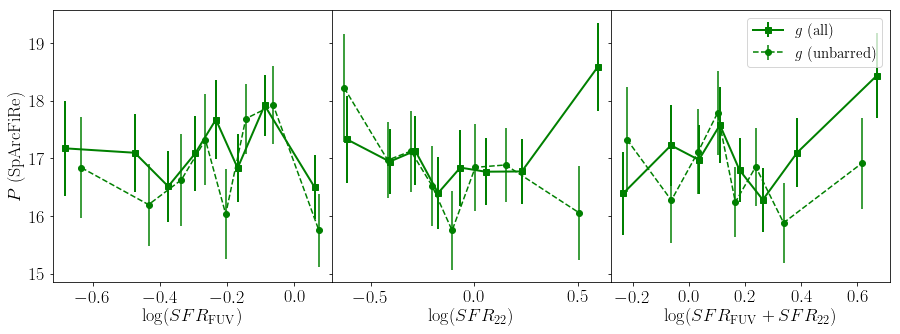

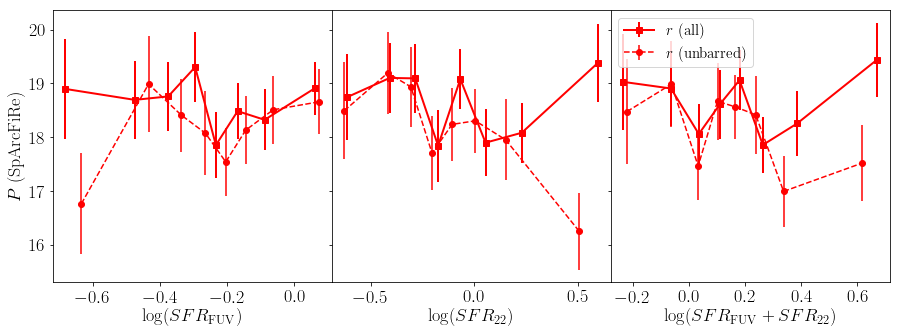

In [26]:
fig, axarr = sfr_panels(sparcfire_g['P'],sfr_spirals,
                        color='g',marker='s',lw=2,
                        ylabel='',label='$g$ (all)')

fig, axarr = sfr_panels(sparcfire_g['P'],sfr_unbarred_spirals,
                        color='g',marker='o',linestyle='dashed',
                        fig=fig,axarr=axarr,ylabel='$P$ (SpArcFiRe)',label='$g$ (unbarred)')

axarr[-1].legend(fontsize=15)

fig, axarr = sfr_panels(sparcfire_r['P'],sfr_spirals,
                        color='r',marker='s',lw=2,
                        ylabel='',label='$r$ (all)')

fig, axarr = sfr_panels(sparcfire_r['P'],sfr_unbarred_spirals,
                        color='r',marker='o',linestyle='dashed',
                        fig=fig,axarr=axarr,ylabel='$P$ (SpArcFiRe)',label='$r$ (unbarred)')

axarr[-1].legend(fontsize=15)

#fig.savefig('figures/sfr_vs_P.pdf')

#### Finally: how do bars, arms and local density relate?

In [16]:
gz_data = Table.read('../fits/full_sample_debiased_w_low_z.fits')

sparcfire['logSigma'] = gz_data['IVAN_DENSITY']

In [27]:
from corner import corner

#help(corner)

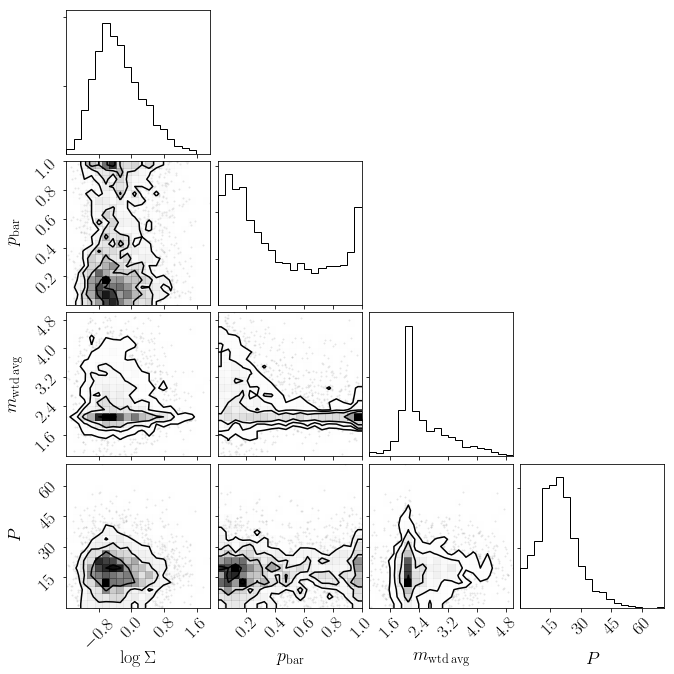

In [24]:
X = np.array([sparcfire['logSigma'],samples['p_bar'],sparcfire['m_wtd_avg'],sparcfire['P']]).T
labels = ['$\log \Sigma$','$p_\mathrm{bar}$','$m_\mathrm{wtd \, avg}$','$P$']

X_spirals = X[spirals]
X_unbarred_spirals = X[unbarred_spirals]

_ = corner(X_spirals,labels=labels)

In [25]:
import pca_analysis
import imp
imp.reload(pca_analysis)
from pca_analysis import pca_analysis

_ = pca_analysis(X_spirals,standardise=True,printout=True)

╒═════════════════╤════════╤════════╤════════╤════════╕
│ Variable        │   PCA1 │   PCA2 │   PCA3 │   PCA4 │
╞═════════════════╪════════╪════════╪════════╪════════╡
│ Exp. var. ratio │   0.34 │   0.25 │   0.24 │   0.16 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho1            │  -0.3  │   0    │   0.94 │   0.03 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho2            │  -0.8  │   0.08 │  -0.22 │   0.54 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho3            │   0.75 │   0.13 │   0.17 │   0.47 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho4            │  -0.03 │   0.99 │  -0.02 │  -0.1  │
╘═════════════════╧════════╧════════╧════════╧════════╛
